# Analyse Exploratoire

### Import des modules

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Aperçu des données

In [80]:
building_consumption = pd.read_csv("../assets/2016_Building_Energy_Benchmarking.csv")
building_consumption.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [81]:
# building_consumption.info()
# building_consumption.describe()
print("Nombre de lignes :", building_consumption.shape[0])
print("Nombre de colonnes :", building_consumption.shape[1])
print("Liste des colonnes :", building_consumption.columns)

Nombre de lignes : 3376
Nombre de colonnes : 46
Liste des colonnes : Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(k

### Filtrer sur les bâtiments non résidentiels uniquement

In [82]:
# Liste des BuildingType résidentiels à exclure
# Choix d'exclure les bâtiments de type "Campus" car ils peuvent inclure des bâtiments non résidentiels
# ainsi que les maisons de retraite, hotels, etc. (qui sont déjà bien catégorisés dans Multifamily)
residential_buildingtypes = [
    "Multifamily MR (5-9)",
    "Multifamily LR (1-4)",
    "Multifamily HR (10+)",
	"Campus"
]

# Filtrer le dataset pour ne garder que les non résidentiels
building_consumption = building_consumption[
    ~building_consumption["BuildingType"].isin(residential_buildingtypes)
]

# Vérification générale : comptage par BuildingType
print(building_consumption["BuildingType"].value_counts())
print("Nombre de bâtiments restants :", building_consumption.shape[0])

BuildingType
NonResidential        1460
SPS-District K-12       98
Nonresidential COS      85
Nonresidential WA        1
Name: count, dtype: int64
Nombre de bâtiments restants : 1644


In [83]:
building_consumption.value_counts("PrimaryPropertyType")

PrimaryPropertyType
Small- and Mid-Sized Office    292
Other                          243
Warehouse                      187
Large Office                   172
K-12 School                    135
Mixed Use Property             110
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      18
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Office                           3
Low-Rise Multifamily             2
Name: count, dtype: int64

### Identification d'éventuels doublons

In [84]:
# Identifier les doublons toutes colonnes confondues
print("Nombres de doublons (toutes colonnes confondues) = ",building_consumption.duplicated().sum())


# Identifier les items dont l'adresse ET le nom de propriété sont identiques (vrais doublons)
address_duplicates = building_consumption[
    building_consumption.duplicated(subset=["Address"], keep=False)
]

address_and_property_duplicates = address_duplicates[
    address_duplicates.duplicated(subset=["PropertyName"], keep=False)
]
print("Nombres de doublons adresse - nom de propriété = ",address_and_property_duplicates.shape[0])


Nombres de doublons (toutes colonnes confondues) =  0
Nombres de doublons adresse - nom de propriété =  0


### Identification des données manquantes (NaN)

In [85]:
missing_percentage = building_consumption.isna().mean() * 100
missing = missing_percentage[missing_percentage > 0]
print(missing.sort_values(ascending=False))

Comments                           100.000000
Outlier                             98.965937
YearsENERGYSTARCertified            94.038929
ThirdLargestPropertyUseTypeGFA      78.953771
ThirdLargestPropertyUseType         78.953771
SecondLargestPropertyUseType        48.661800
SecondLargestPropertyUseTypeGFA     48.661800
ENERGYSTARScore                     33.759124
ZipCode                              0.973236
LargestPropertyUseTypeGFA            0.364964
LargestPropertyUseType               0.364964
SiteEUI(kBtu/sf)                     0.182482
SiteEUIWN(kBtu/sf)                   0.182482
SiteEnergyUseWN(kBtu)                0.182482
Electricity(kBtu)                    0.121655
TotalGHGEmissions                    0.121655
NaturalGas(kBtu)                     0.121655
NaturalGas(therms)                   0.121655
SourceEUI(kBtu/sf)                   0.121655
Electricity(kWh)                     0.121655
SteamUse(kBtu)                       0.121655
SiteEnergyUse(kBtu)               

### Identification et suppression des outliers notés dans le dataset

In [86]:
# Postulat : les outliers sont des erreurs de saisie, donc à exclure
building_consumption = building_consumption[building_consumption["Outlier"].isna()]
building_consumption.shape[0]

1627

### Identification des items avec un NumberofBuildings = 0

In [87]:

zero_buildings = building_consumption[building_consumption["NumberofBuildings"] == 0]
print("Nombres de lignes avec NumberofBuildings = 0 :", zero_buildings.shape[0])
# Postulat : un bâtiment ne peut pas avoir 0 bâtiment, donc on remplace les 0 par 1
building_consumption["NumberofBuildings"] = building_consumption["NumberofBuildings"].replace(0, 1)
# Vérification
print("Nombres de lignes avec NumberofBuildings = 0 après correction :", building_consumption[building_consumption["NumberofBuildings"] == 0].shape[0])

Nombres de lignes avec NumberofBuildings = 0 : 52
Nombres de lignes avec NumberofBuildings = 0 après correction : 0


### Vérification que la somme des surfaces des bâtiments et parkings fait bien la surface totale

In [88]:

(
    building_consumption["PropertyGFAParking"]
    + building_consumption["PropertyGFABuilding(s)"]
    == building_consumption["PropertyGFATotal"]
).all()

np.True_

### Analyse des TARGETs possibles + choix de la TARGET finale

In [89]:
# GHG Emissions Intensity, Total GHG Emissions (metric tons CO2e), SiteEnergyUseWN(kBtu)

import sys
import importlib

sys.path.append("..")
import config

importlib.reload(config)  # Ensure we get the latest TARGET value
from config import TARGET

In [90]:
building_consumption[TARGET].describe()

count     1625.000000
mean       161.795077
std        556.851108
min         -0.800000
25%         20.120000
50%         49.290000
75%        135.810000
max      12307.160000
Name: TotalGHGEmissions, dtype: float64

### Analyse univariée des features numériques

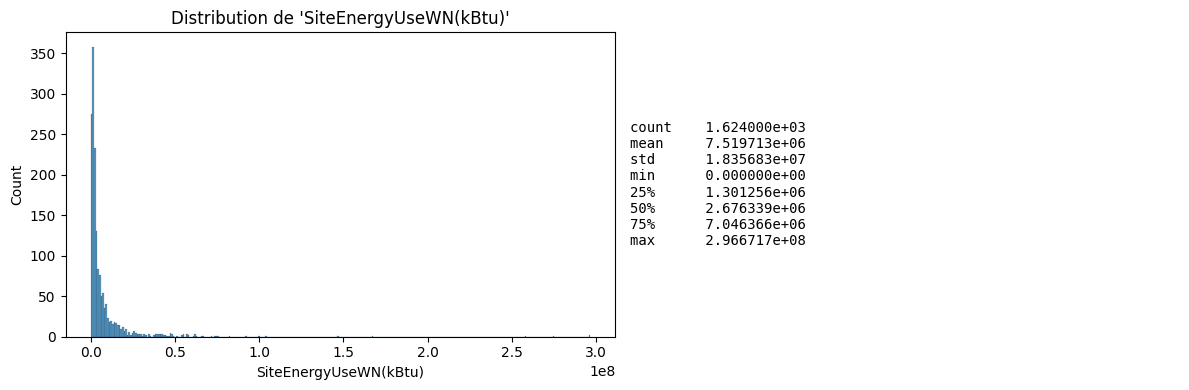

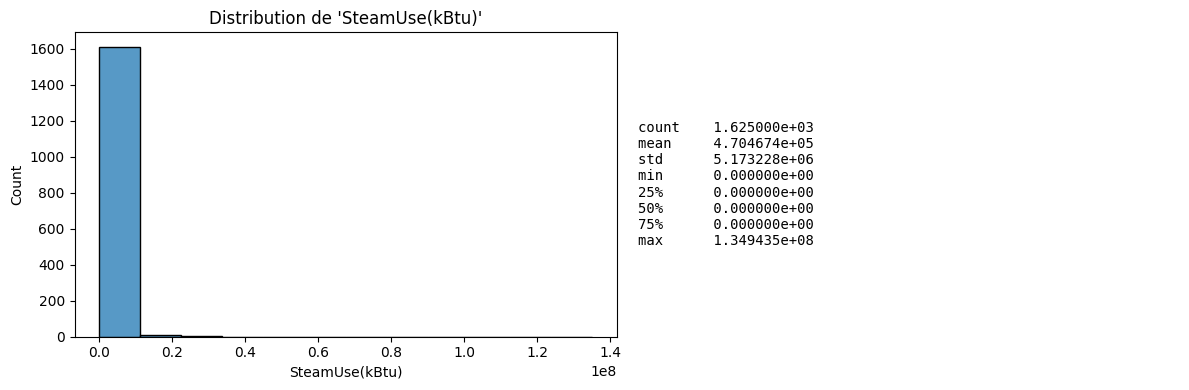

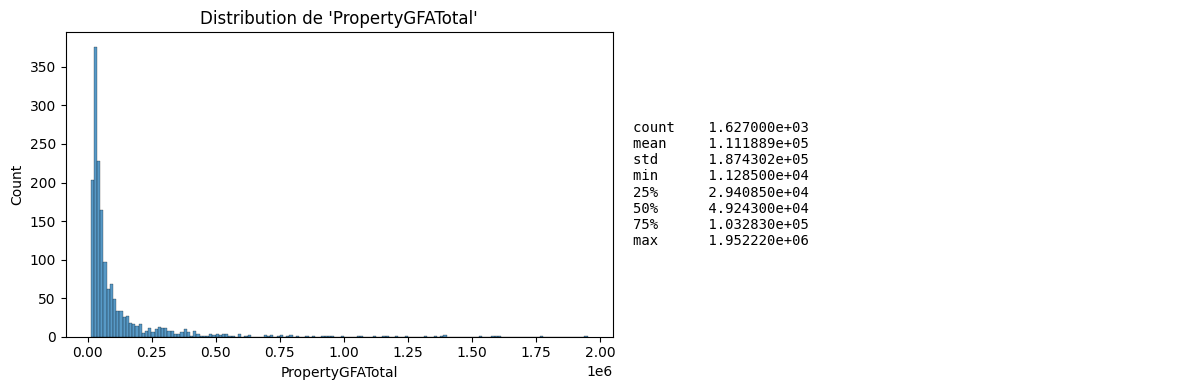

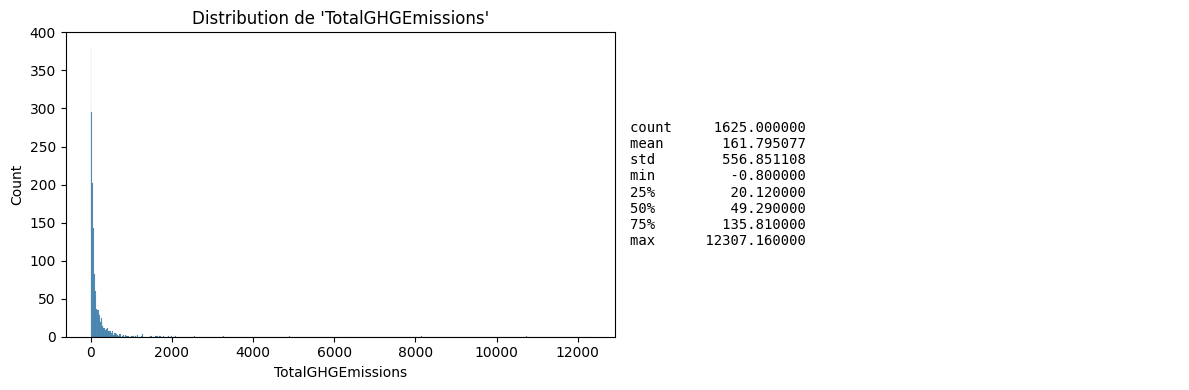

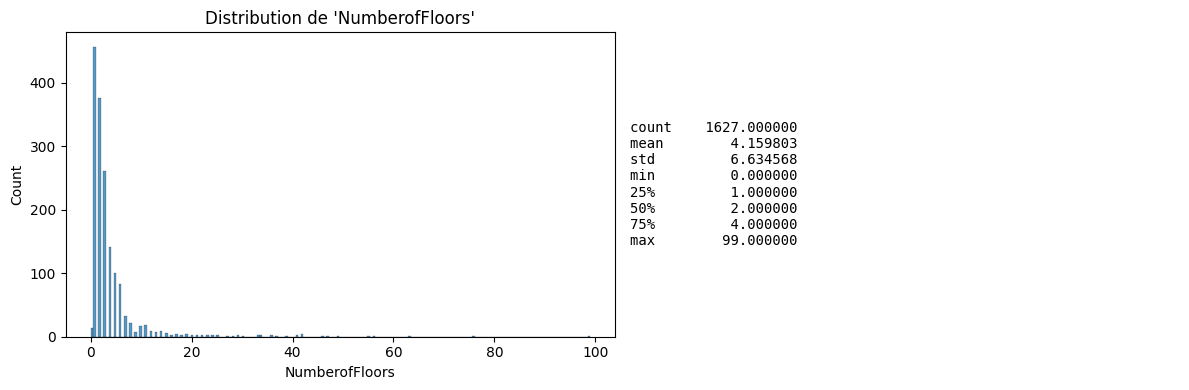

In [103]:
# Features numériques à analyser
numerical_features = [
    "SiteEnergyUseWN(kBtu)",
    "SteamUse(kBtu)",
    "PropertyGFATotal",
    "TotalGHGEmissions",
    "NumberofFloors",
]

for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Boxplot
    sns.histplot(data=building_consumption, x=feature, ax=axes[0])
    axes[0].set_title(f"Distribution de '{feature}'")
    axes[0].set_xlabel(feature)

    # Tableau descriptif affiché sous forme de texte
    stats = building_consumption[feature].describe()
    axes[1].axis("off")  # pas d'axes
    stats_text = stats.to_string()  # transforme en texte formaté
    axes[1].text(0, 0.5, stats_text, fontsize=10, va="center", family="monospace")

    plt.tight_layout()
    plt.show()

### Analyse des features catégorielles

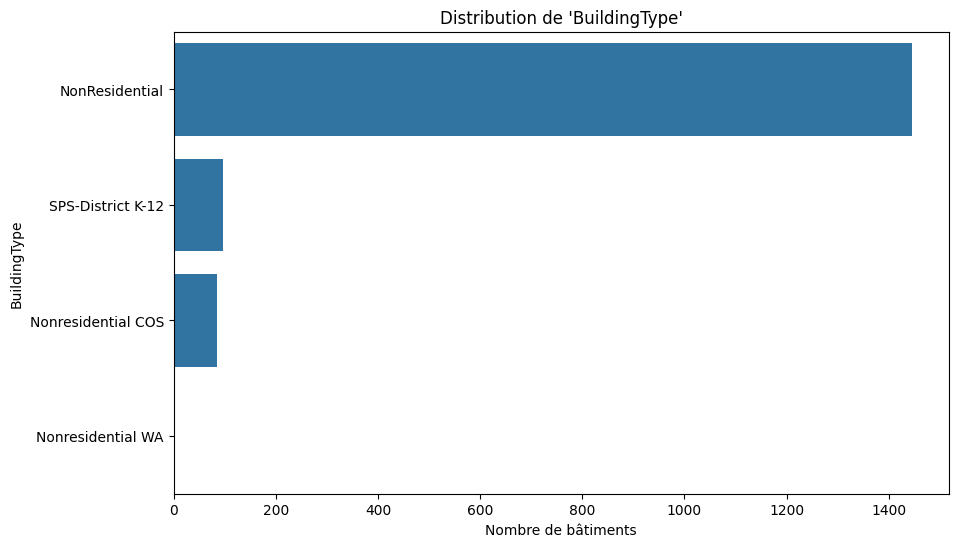

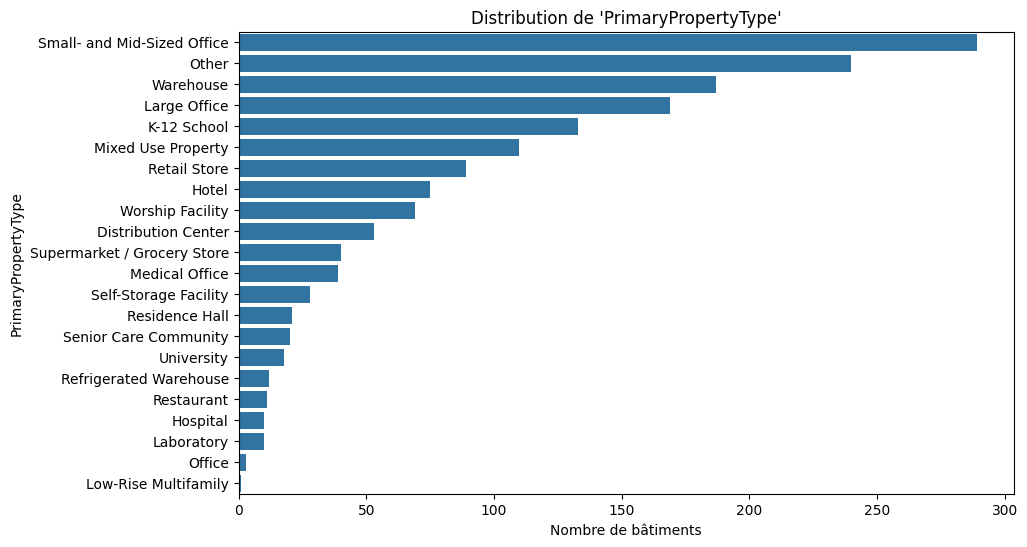

In [102]:
categorical_features = [
    "BuildingType",
    "PrimaryPropertyType"
]
for feature in categorical_features:
	plt.figure(figsize=(10, 6))
	sns.countplot(data=building_consumption, y=feature, order=building_consumption[feature].value_counts().index)
	plt.title(f"Distribution de '{feature}'")
	plt.xlabel("Nombre de bâtiments")
	plt.ylabel(feature)
	plt.show()

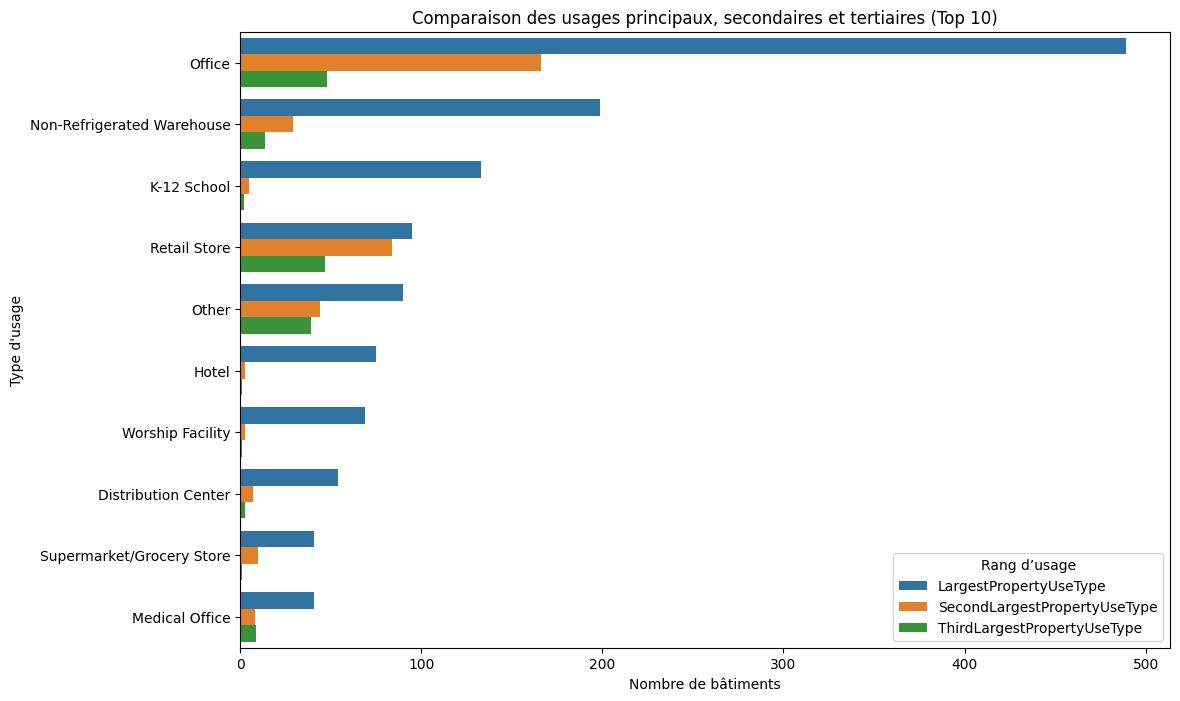

In [93]:
# Colonnes à comparer
features = [
    "LargestPropertyUseType",
    "SecondLargestPropertyUseType",
    "ThirdLargestPropertyUseType",
]

# Top 10 des LargestPropertyUseType
top10_largest = (
    building_consumption["LargestPropertyUseType"]
    .value_counts()
    .nlargest(10)
    .index.tolist()
)

# Filtrer uniquement sur ces usages
building_consumption_for_top10 = building_consumption.loc[
    building_consumption["LargestPropertyUseType"].isin(top10_largest)
    | building_consumption["SecondLargestPropertyUseType"].isin(top10_largest)
    | building_consumption["ThirdLargestPropertyUseType"].isin(top10_largest)
]

# Transformer en format long
df_long = building_consumption_for_top10[features].melt(
    var_name="UseTypeRank", value_name="UseType"
)

# Garder que les catégories du top 10
df_long = df_long[df_long["UseType"].isin(top10_largest)]

plt.figure(figsize=(12, 8))
sns.countplot(
    data=df_long,
    y="UseType",
    hue="UseTypeRank",
    order=top10_largest,  # impose l’ordre du top10
)

plt.title("Comparaison des usages principaux, secondaires et tertiaires (Top 10)")
plt.xlabel("Nombre de bâtiments")
plt.ylabel("Type d'usage")
plt.legend(title="Rang d’usage")
plt.show()

### Analyse des bâtiments multi-usages / mono-usages

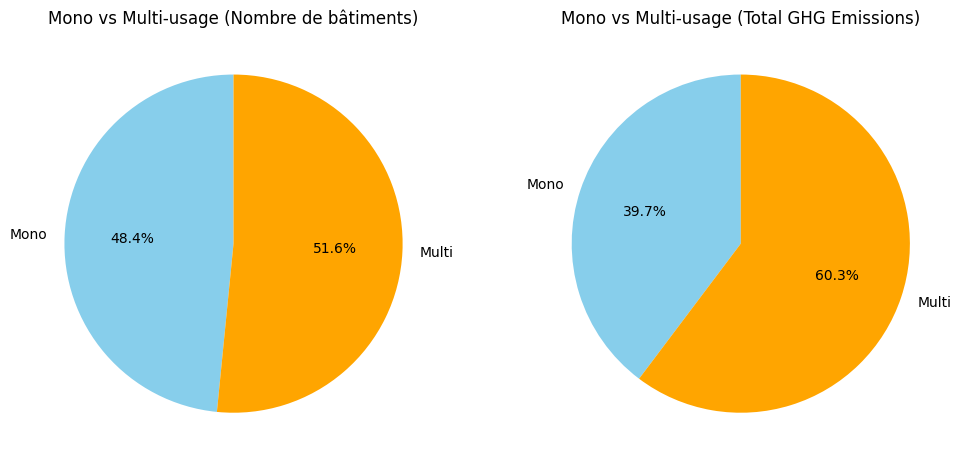

In [94]:

# Définir la catégorie Mono / Multi sans créer de nouvelle colonne
usage_type = building_consumption["ListOfAllPropertyUseTypes"].apply(
    lambda x: "Mono" if "," not in str(x) else "Multi"
)

# Définir un ordre fixe
categories = ["Mono", "Multi"]

# Comptage nombre de bâtiments
counts = usage_type.value_counts().reindex(categories)

# Somme des émissions totales
ghg_sums = (
    building_consumption.groupby(usage_type)["TotalGHGEmissions"]
    .sum()
    .reindex(categories)
)

# Palette commune
colors = ["skyblue", "orange"]

# Figure avec 2 sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Camembert nombre de bâtiments
axes[0].pie(
    counts, labels=counts.index, autopct="%1.1f%%", colors=colors, startangle=90
)
axes[0].set_title("Mono vs Multi-usage (Nombre de bâtiments)")

# Camembert Total GHG
axes[1].pie(
    ghg_sums, labels=ghg_sums.index, autopct="%1.1f%%", colors=colors, startangle=90
)
axes[1].set_title("Mono vs Multi-usage (Total GHG Emissions)")

plt.show()

### Analyse bivariée entre TARGET et les autres variables numériques

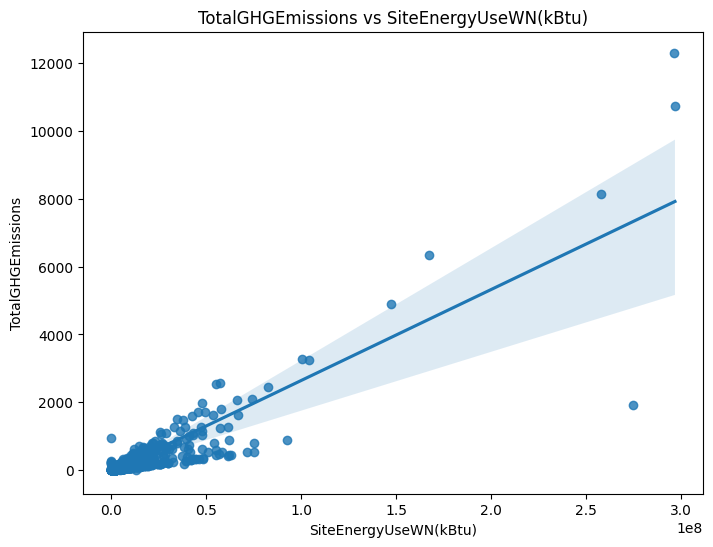

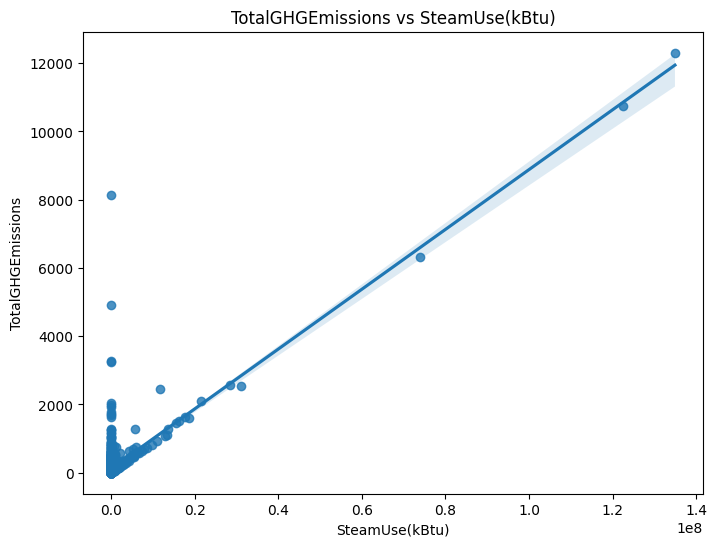

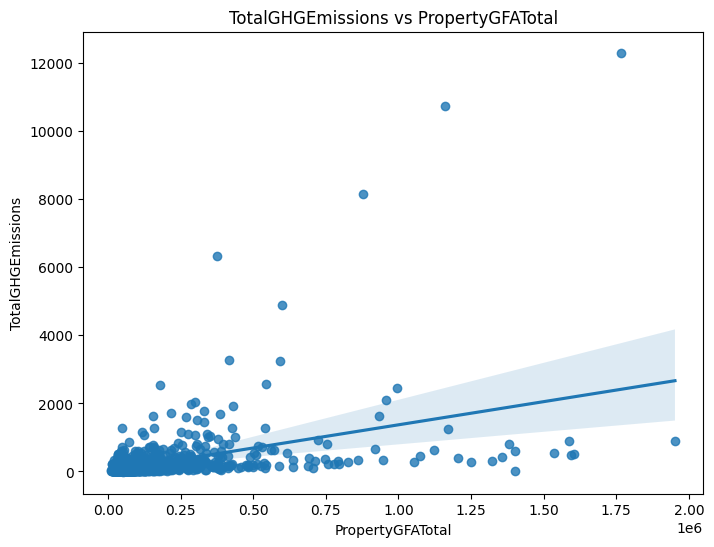

In [100]:
for feature in numerical_features:
    if feature != TARGET:
        plt.figure(figsize=(8, 6))
        sns.regplot(data=building_consumption, x=feature, y=TARGET)
        plt.title(f"{TARGET} vs {feature}")
        plt.xlabel(feature)
        plt.ylabel(TARGET)
        plt.show()

In [96]:
### Dataset post analyse et traitement
building_consumption.to_csv("../assets/building_consumption_post_EDA.csv", index=False)
building_consumption_post_eda = pd.read_csv("../assets/building_consumption_post_EDA.csv")
print("Nombre de lignes :", building_consumption_post_eda.shape[0])

Nombre de lignes : 1627


#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 